In [0]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim

In [0]:
class GPNet3(nn.Module):
  def __init__(self):
    super(GPNet3, self).__init__()
    self.fc1 = nn.Linear(6, 50)
    self.fc2 = nn.Linear(50, 50)
    self.fc3 = nn.Linear(50, 4)
    self.JHist = []
      
  def forward(self, x):
    x = self.standardize_data(x)
    x = torch.tanh(self.fc1(x))
    x = torch.tanh(self.fc2(x))
    x = self.fc3(x)
    return x

  def standardize_info(self, train_x):
    self.mean = torch.mean(train_x, 0)
    self.std = train_x.std(0)
  
  def standardize_data(self, train_x):
    return (train_x - self.mean) / self.std

  def fit(self, train_x, train_y, batch_size=128, epochs=800, lr=0.01, showLoss=False):
    if len(self.JHist) == 0:
      self.standardize_info(train_x)

    optimizer = optim.SGD(self.parameters(), lr=lr)
    criterion = nn.MSELoss()

    data_size = train_x.shape[0]
    num_batches = int(data_size / batch_size)
    for e in range(epochs):
      
      epoch_loss = 0

      for b in range(num_batches):
        x_batch = train_x[b*batch_size:min((b+1)*batch_size, data_size),:]
        y_batch = train_y[b*batch_size:min((b+1)*batch_size, data_size),:]
        
        optimizer.zero_grad()

        y_pred = net(x_batch) # define input

        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

      if e % 100 == 99 and showLoss:
        print(e + 1, epoch_loss)

      self.JHist.append(epoch_loss)
    

In [0]:
savedData = torch.from_numpy(np.loadtxt('data.csv', delimiter=','))

In [9]:
input, output = savedData[:,:6], savedData[:,6:]
train_x, test_x = input[:10000,:], input[10000:,:]
train_y, test_y = output[:10000,:], output[10000:,:]
print(train_x[5,:])

tensor([-0.3625, -1.8014,  7.0715,  0.4220,  0.9066,  0.2341],
       dtype=torch.float64)


In [10]:
net = GPNet3().double()
print(net)

GPNet3(
  (fc1): Linear(in_features=6, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=4, bias=True)
)


In [0]:
net.fit(train_x, train_y, epochs=300, lr=0.00025, showLoss=False)

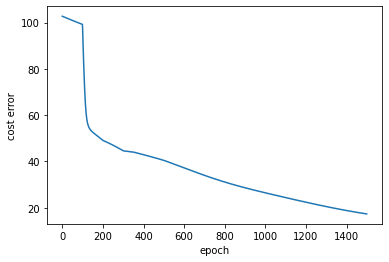

In [38]:
import matplotlib.pyplot as plt
plt.plot(net.JHist)
plt.ylabel("cost error")
plt.xlabel("epoch")
plt.show()

In [39]:
with torch.no_grad():
  criterion = nn.MSELoss()
  y_pred = net(test_x)
  loss = criterion(y_pred, test_y)
  print(loss.item())
  print(y_pred[7,:])
  print(test_y[7,:])

0.18205809703358014
tensor([ 0.2382,  0.2210,  0.1298, -0.0839], dtype=torch.float64)
tensor([-0.1337,  0.1023,  0.0955, -0.0767], dtype=torch.float64)


In [20]:
print(net.JHist)

[102.7235494939776, 102.68654783893575, 102.64957922350516, 102.61264354927407, 102.57574071817564, 102.53887063248696, 102.50203319482809, 102.46522830816045, 102.42845587578564, 102.39171580134473, 102.35500798881633, 102.31833234251617, 102.28168876709519, 102.24507716753904, 102.20849744916634, 102.17194951762777, 102.13543327890515, 102.09894863930985, 102.0624955054818, 102.02607378438859, 101.98968338332391, 101.95332420990681, 101.91699617208026, 101.88069917811026, 101.84443313658474, 101.80819795641222, 101.77199354682085, 101.7358198173572, 101.6996766778856, 101.6635640385864, 101.6274818099554, 101.59142990280245, 101.55540822825061, 101.51941669773491, 101.48345522300143, 101.44752371610605, 101.4116220894137, 101.37575025559701, 101.33990812763537, 101.30409561881402, 101.26831264272278, 101.23255911325529, 101.19683494460769, 101.16114005127807, 101.12547434806467, 101.08983775006577, 101.05423017267809, 101.01865153159586, 100.98310174281029, 100.94758072260784, 100.91

In [0]:
PATH = './GPNet3.pth'
torch.save(net.state_dict(), PATH)